In [1]:
from datetime import datetime, timedelta
import math
# import pyodbc as odbc
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# from getpass import getpass, getuser
from functools import reduce

# Connecting to System to retrieve data

In [ ]:
# uid = 'DOMINA_CONSULTA'
# pw = getpass(prompt='Password: ', stream=None)

In [ ]:
# domina_connection = odbc.connect("DSN=DOMINA_PRODUCTION;UID=" + uid + ";PWD=" +pw, autocommit = True)

In [ ]:
# query_text = """
#  SELECT y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion, y.BIN_YAW, sum(y.pot_media) AS "Sum_Of_Avg_W_In_Bin", RANK() OVER (PARTITION BY y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion ORDER BY sum(y.pot_media) DESC ) AS "Yaw_Bin_Rank"
#     FROM DOMINAGE.R_DATOS_YMA y
#         inner join DOMINAGE.DGE_INSTALACIONES i
#             ON i.cod_instalacion = y.cod_instalacion
#         inner join DOMINAGE.DGE_ELEMENTOS e
#             ON e.cod_elemento = y.cod_elemento
    
#     WHERE FEC_HORA_FIN BETWEEN TO_DATE('2020-11-01','yyyy-mm-dd') AND TO_DATE('2020-11-01','yyyy-mm-dd') AND y.tiempo_total >= 100 AND BIN_VIENTO IN ('(6, 9]','(9, 12]','(3, 6]') AND
#     i.nom_instalacion IN ('BLUE CREEK', 'SOUTH CHESTNUT', 'WINNEBAGO I', 'URKILLA',
#        'MOUNTAIN VIEW III', 'JUNIPER CANYON', 'ALMENDROS I', 'ARIZONA I',
#        'CABRAS', 'CAETITE I', 'CAETITE II', 'CAETITE III', 'CALANGO I',
#        'CALANGO II', 'CALANGO III', 'CALANGO IV', 'CALANGO V',
#        'CALANGO VI', 'CANOAS', 'DOS ARBOLITOS', 'LAGOA I', 'LAGOA II',
#        'MEL II', 'SANTANA I', 'SANTANA II', 'ALBUREJOS', 'ALOGORACHIS',
#        'ALTAMIRA', 'ALTO DE LA DEGOLLADA', 'ALTO MONÇAO', 'ALVAO',
#        'AMUNDSEN', 'ARACHNAIO II', 'ARECLEOCH', 'ARGAÑOSO', 'BADAIA',
#        'BII NEE STIPA', 'BOLAÑOS', 'BORDECOREX NORTE', 'BULLANA',
#        'BUREBA', 'CABEZAS', 'CAMPILLOS', 'CANALEJAS', 'CANDAL',
#        'CANTALOJAS', 'CAPIRUZA I', 'CARRASCOSA', 'CARRASQUILLO', 'CARRIL',
#        'CATEFICA', 'CAÑONERAS', 'CENTENAR', 'CERRO BLANCO',
#        'CERRO HIGUERA', 'CHAMBON', 'CHIMICHE II', 'CHORREADEROS BAJOS',
#        'COLLADOS', 'CONESA II', 'CORTIJO LINERA', 'COTERA',
#        'COTEREJON II', 'CRUZ DE CARRUTERO', 'CUEZA', 'DESERT WIND',
#        'DOLAR III', 'DOS PUEBLOS', 'DOÑA BENITA', 'DUEÑAS', 'ENTREDICHO',
#        'ESPARTAL', 'FERREIRA II', 'FUENDETODOS II', 'FUENTESALADA',
#        'GOIA PEÑOTE', 'GOMERA', 'GRADO', 'GRIJOTA', 'HAY CANYON',
#        'HONTALBILLA I', 'HONTALBILLA II', 'HUENEJA III', 'ISLETES',
#        'LABRADAS', 'LAROUCO', 'LIRIOS', 'MAGDALENA', 'MAJAL ALTO',
#        'MEIRA', 'MIHAI VITEAZU', 'MONTE TREITO', 'MONTECARRIO',
#        'MORON DE ALMAZAN', 'MUELA CUBILLO', 'NACIMIENTO', 'NAVAZO',
#        'NEW HARVEST', 'OIZ', 'PARAMO VEGA', 'PEBBLE SPRINGS', 'PEDREGAL',
#        'PENA DA CRUZ', 'PEÑAFLOR III', 'PEÑAFLOR IV', 'PIER II',
#        'PORTELRUBIO', 'PUERTO DE MALAGA', 'RADONA I', 'RADONA II',
#        'RETUERTA', 'ROMERAL', 'SABINA', 'SAUCITO', 'SAVALLA', 'SEGREDAL',
#        'SERRA DO BURGO', 'SIERRA DE ALCARAMA II', 'SIERRA DE DUEÑA',
#        'SIERRA MENERA', 'SIERRO', 'SOMBRIO', 'SOMOLINOS',
#        'TACICA DE PLATA', 'TALLISCA', 'TARAYUELA', 'TARDIENTA II',
#        'TERUELO', 'TORRECILLA', 'URBEL DEL CASTILLO II', 'VALBONILLA',
#        'VALDECARRION', 'VALDEFUENTES', 'VALDELANAVE', 'VALDEPERONDO',
#        'VALDEPORRES', 'VALMEDIANO', 'VENTA III', 'VENTOSA DEL DUCADO',
#        'VENZO', 'VIEIRO', 'VILLALAZAN', 'VIVEIRO', 'VIÑAS', 'DOLAR I',
#        'HIJES', 'ZORRERAS', 'SIL AMPLIACION', 'ELGEA',
#        'CHORREADEROS ALTOS', 'FUENDETODOS I', 'BLACK LAW II', 'BARTON I',
#        'BIG HORN II', 'BUFFALO RIDGE II', 'CAYUGA RIDGE', 'DRY LAKE I',
#        'GLEN APP', 'HARDSCRABBLE', 'MORAINE II', 'PROVIDENCE HEIGHTS',
#        'STAR POINT', 'TWIN BUTTES II', 'BUEY', 'PINILLA',
#        'ATALAYA DE LA SOLANA', 'CAMPALBO', 'CERRO VICENTE II', 'CRUZ I',
#        'MONTE MOLON', 'PICO COLLALBAS', 'RUGBY', 'KISIGMAND',
#        'HARE HILL II', 'VIRGEN DE BELEN I', 'SIL', 'EL CABO',
#        'ALMENDROS II', 'CAPIRUZA II', 'SIERRA DE ALCARAMA I', 'BARTON II',
#        'LEANING JUNIPER IIA', 'CERRO REVOLCADOR', 'GAVILANES AMPLIACION',
#        'CERRO VICENTE I', 'CRUZ II', 'MIRA', 'BARTON CHAPEL',
#        'CERRO DE LA SILLA', 'REVENTONES', 'CSOMA I', 'CSOMA II',
#        'CASSELMAN', 'CLARES', 'COLORADO GREEN', 'DRY LAKE II',
#        'DEERFIELD', 'ESCALON', 'GROTON', 'CABEZUELO', 'LEMPSTER',
#        'TOP OF IOWA II', 'LUZON NORTE', 'LAYNA', 'BAFFIN BAY',
#        'MARANCHON I', 'MARANCHON IV', 'MARANCHON SUR', 'SCOTT',
#        'ELK RIVER', 'WHITELEE II', 'HARESTANES', 'BEINN THARSUINN',
#        'CLACHAN FLATS', 'MARK HILL')
#    group by y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion, y.BIN_YAW
# """ 

In [ ]:
# input_data = pd.read_sql(query_text,
#                        domina_connection)

In [ ]:
# input_data.shape

In [ ]:
# query2_text = """
#   SELECT dfa.nom_fabricante "OEM", dm.nom_modelo "Model", di.nom_instalacion "Site", de.nom_elemento, de.cod_elemento
#      FROM DOMINAGE.dge_modelos dm
#      inner join DOMINAGE.dge_fabricantes dfa
#             ON dm.cod_fabricante = dfa.cod_fabricante
#         inner join DOMINAGE.dge_elementos de 
#             ON de.cod_modelo = dm.cod_modelo
#         inner join dominage.dge_instalaciones di 
#             ON de.cod_instalacion = di.cod_instalacion
# """ 

In [ ]:
# oem_data = pd.read_sql(query2_text,
#                        domina_connection)

In [ ]:
oem_data = pd.read_csv("oem_data.csv")
input_data = pd.read_csv("input_data.csv")

input_data.drop(["Unnamed: 0"], axis=1, inplace=True)
oem_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [3]:
oem_data = pd.read_csv("../data/oem_data.csv")
oem_data.head()

,Unnamed: 0,OEM,Model,Site,NOM_ELEMENTO,COD_ELEMENTO
0,0,GAMESA,G52-850 kW,HIJES,A13,1025.0
1,1,GAMESA,G47-660 kW,HIJES,A17,1026.0
2,2,GAMESA,G52-850 kW,HIJES,A05,1028.0
3,3,GAMESA,G52-850 kW,HIJES,A07,1029.0
4,4,GAMESA,G52-850 kW,HIJES,A03,1030.0


In [5]:
oem_data.shape

(14040, 6)

In [7]:
oem_data.columns

Index(['Unnamed: 0', 'OEM', 'Model', 'Site', 'NOM_ELEMENTO', 'COD_ELEMENTO'], dtype='object')

In [9]:
oem_data.drop('Unnamed: 0' , axis=1 , inplace=True)

In [10]:
oem_data.head()

,OEM,Model,Site,NOM_ELEMENTO,COD_ELEMENTO
0,GAMESA,G52-850 kW,HIJES,A13,1025.0
1,GAMESA,G47-660 kW,HIJES,A17,1026.0
2,GAMESA,G52-850 kW,HIJES,A05,1028.0
3,GAMESA,G52-850 kW,HIJES,A07,1029.0
4,GAMESA,G52-850 kW,HIJES,A03,1030.0


In [21]:
input_data = pd.read_csv("../data/input_data.csv")
input_data.head()

,Unnamed: 0,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank
0,0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0
1,1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0
2,2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0
3,3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0
4,4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0


In [22]:
input_data.drop('Unnamed: 0' , axis=1 , inplace=True)

In [23]:
input_data.head()

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0


In [ ]:
# Using dictionary to create a new dataframe for yaw_angle

In [13]:
yaw_angle_data=pd.DataFrame(
    {
        "yaw.bin" : ["(-Infinito, -26]","(-26, -22]","(-22, -18]","(-18, -14]","(-14, -10]","(-10, -6]","(-6, -2]","(-2, 2]","(2, 6]","(6, 10]","(10, 14]","(14, 18]","(18, 22]","(22, 26]","(26, Infinito]"],
        "Angle" : [-26,-24,-20,-16,-12,-8,-4,0,4,8,12,16,20,24,26]
    }
)

In [ ]:
# renaming dataaframes

In [24]:
yaw_data = input_data

# Merging the Yaw_data with yaw_angle_data

In [ ]:
yaw_data = pd.merge(yaw_data, yaw_angle_data, left_on="BIN_YAW", right_on="yaw.bin", how="left").drop(["yaw.bin"], axis=1)

In [ ]:
# Dropping column "Nom elemento" from oem data

In [25]:
oem_data.drop(["NOM_ELEMENTO"], axis=1, inplace=True)

# Merging Oem dataframe with Yaw_dataframe

In [26]:
oem_yaw_data = pd.merge(yaw_data, oem_data, left_on="COD_ELEMENTO", right_on="COD_ELEMENTO", how="left")
oem_yaw_data

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
...,...,...,...,...,...,...,...,...,...,...
57259,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(14, 18]",2718.96,11.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57260,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(-Infinito, -26]",2693.18,12.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57261,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(26, Infinito]",2644.22,13.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57262,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(18, 22]",2525.33,14.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA


### Query data based on the Yaw_Bin_Rank = 1.0 (alert)

In [46]:
oem_yaw_rank1 = oem_yaw_data[oem_yaw_data["Yaw_Bin_Rank"] == 1.0]
oem_yaw_rank1

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
...,...,...,...,...,...,...,...,...,...,...
57189,2020-10-01,Z-5,15669.0,EL CABO,"(14, 18]",3552.95,1.0,GAMESA,G114-2.1 MW,EL CABO
57204,2020-10-01,Z1,10005.0,LEANING JUNIPER IIA,"(-10, -6]",2802.96,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57219,2020-10-01,Z3,10007.0,LEANING JUNIPER IIA,"(-26, -22]",2788.93,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57234,2020-10-01,Z4,10008.0,LEANING JUNIPER IIA,"(-10, -6]",2854.87,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA


### 1) What alerts are active ?

### Plotting all the Windfarms and OEM Model in Yaw misalignment range

In [33]:
oem_yaw_data.head()

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK


In [34]:
oem_yaw_data.dtypes

FEC_HORA_INI            object
NOM_ELEMENTO            object
COD_ELEMENTO           float64
NOM_INSTALACION         object
BIN_YAW                 object
Sum_Of_Avg_W_In_Bin    float64
Yaw_Bin_Rank           float64
OEM                     object
Model                   object
Site                    object
dtype: object

In [35]:
oem_yaw_data.columns

Index(['FEC_HORA_INI', 'NOM_ELEMENTO', 'COD_ELEMENTO', 'NOM_INSTALACION',
       'BIN_YAW', 'Sum_Of_Avg_W_In_Bin', 'Yaw_Bin_Rank', 'OEM', 'Model',
       'Site'],
      dtype='object')

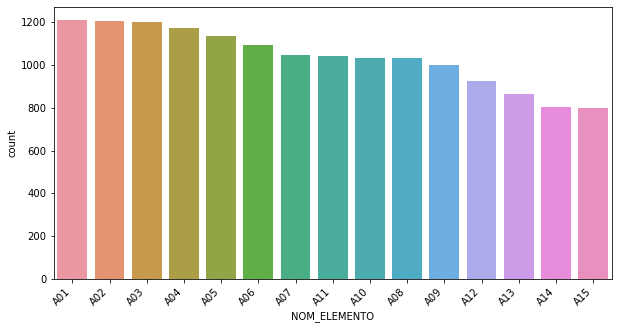

In [39]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x= "NOM_ELEMENTO" ,data = oem_yaw_data, 
              order = oem_yaw_data['NOM_ELEMENTO'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

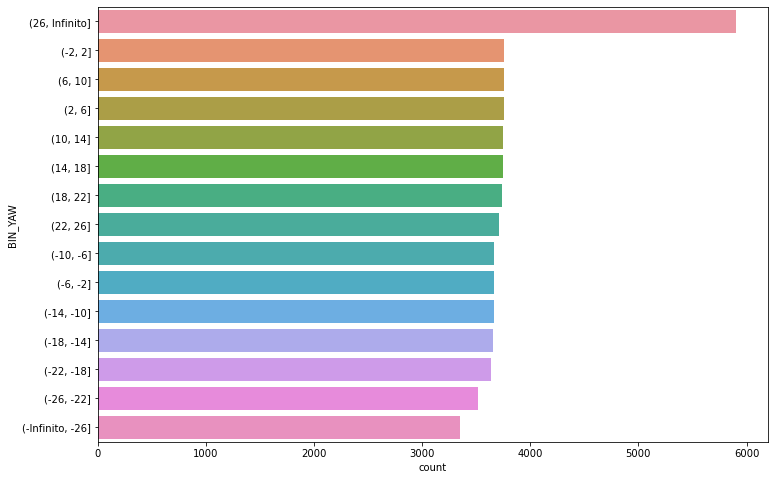

In [44]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "BIN_YAW", data=oem_yaw_data, order=oem_yaw_data['BIN_YAW'].value_counts().iloc[:25].index)
plt.show()

# Alerts

In [49]:
oem_alert = oem_yaw_rank1.groupby(["Model", "BIN_YAW"]).sum()["Yaw_Bin_Rank"].reset_index()
oem_alert

,Model,BIN_YAW,Yaw_Bin_Rank
0,ECO100,"(-10, -6]",21.0
1,ECO100,"(-14, -10]",11.0
2,ECO100,"(-18, -14]",5.0
3,ECO100,"(-2, 2]",12.0
4,ECO100,"(-22, -18]",1.0
...,...,...,...
179,V47-660 kW,"(26, Infinito]",3.0
180,V47-660 kW,"(6, 10]",4.0
181,V66-1.75 MW,"(-2, 2]",7.0
182,V66-1.75 MW,"(2, 6]",2.0


In [52]:
oem_alert = oem_alert.sort_values(by=["Yaw_Bin_Rank"], ascending=False)
oem_alert

,Model,BIN_YAW,Yaw_Bin_Rank
79,G52-850 kW,"(26, Infinito]",1137.0
81,G58-850 kW,"(26, Infinito]",615.0
111,G87-2.0 MW,"(6, 10]",456.0
108,G87-2.0 MW,"(2, 6]",314.0
124,G90-2.0 MW,"(6, 10]",258.0
...,...,...,...
104,G87-2.0 MW,"(-Infinito, -26]",1.0
102,G87-2.0 MW,"(-26, -22]",1.0
133,GE 1.5s,"(-14, -10]",1.0
94,G83-2.0 MW,"(-14, -10]",1.0


In [53]:
oem_alert["BIN_YAW"].value_counts()

(2, 6]              18
(-2, 2]             17
(10, 14]            16
(26, Infinito]      16
(6, 10]             16
(18, 22]            14
(14, 18]            14
(-10, -6]           11
(-14, -10]          11
(-6, -2]            11
(22, 26]            10
(-22, -18]           8
(-18, -14]           8
(-Infinito, -26]     7
(-26, -22]           7
Name: BIN_YAW, dtype: int64

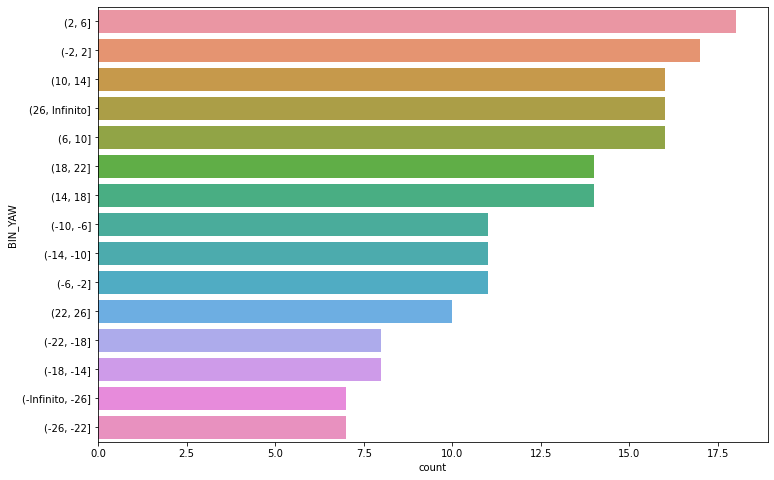

In [55]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "BIN_YAW", data=oem_alert, order=oem_alert['BIN_YAW'].value_counts().index)
plt.show()

# Ordering Based on Bin_Yaw

In [56]:
bin_yaw_order = {"(-Infinito, -26]", "(-26, -22]", "(-22, -18]", "(-18, -14]",
                 "(-14, -10]", "(-10, -6]", "(-6, -2]", "(-2, 2]", "(2, 6]", 
                 "(6, 10]", "(10, 14]", "(14, 18]", "(18, 22]", "(22, 26]", "(26, Infinito]"}

In [57]:
bin_yaw_order_dict = {"(-Infinito, -26]": 1, "(-26, -22]": 2, "(-22, -18]": 3, 
                      "(-18, -14]": 4, "(-14, -10]": 5, "(-10, -6]": 6, "(-6, -2]": 7,
                      "(-2, 2]": 8, "(2, 6]": 9, "(6, 10]": 10, "(10, 14]": 11, 
                      "(14, 18]": 12, "(18, 22]": 13, "(22, 26]": 14, "(26, Infinito]": 15}

In [58]:
alert_ordered = oem_alert.set_index("BIN_YAW").loc[bin_yaw_order]
alert_ordered

,Model,Yaw_Bin_Rank
BIN_YAW,,
"(-2, 2]",G87-2.0 MW,208.0
"(-2, 2]",G90-2.0 MW,137.0
"(-2, 2]",G97-2.0 MW,32.0
"(-2, 2]",G80-2.0 MW,20.0
"(-2, 2]",S88-2.1 MW,15.0
...,...,...
"(22, 26]",G114-2.1 MW,5.0
"(22, 26]",ECO80 S1,2.0
"(22, 26]",G114-2.0 MW,1.0


In [63]:
oem_alert.head()

,Model,BIN_YAW,Yaw_Bin_Rank
79,G52-850 kW,"(26, Infinito]",1137.0
81,G58-850 kW,"(26, Infinito]",615.0
111,G87-2.0 MW,"(6, 10]",456.0
108,G87-2.0 MW,"(2, 6]",314.0
124,G90-2.0 MW,"(6, 10]",258.0


In [67]:
# Let's convert population to integers as its an object at this moment
# oem2['Yaw_Bin_Rank'] = oem2['Yaw_Bin_Rank'].map(lambda x: int(x))

TypeError: 'Int64Index' object is not callable

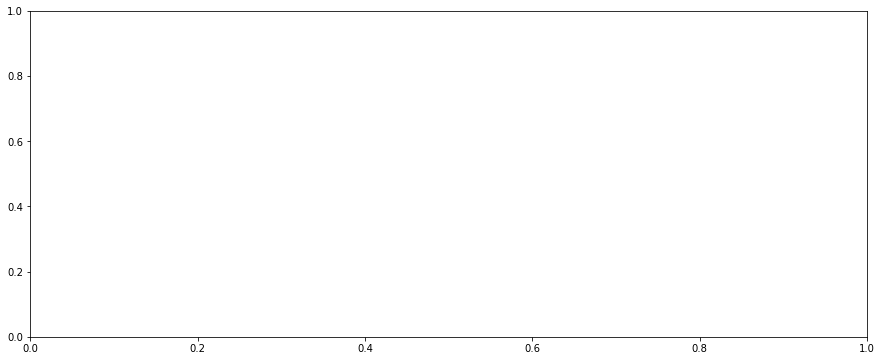

In [68]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = oem_alert['Yaw_Bin_Rank'].value_counts().iloc[:25].index()
ax.bar(data_q1.index, data_q1, width=0.55, 
       edgecolor='darkgray', color='#004c70',
       linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)   

ax.set_ylim(0, 6500)    
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 6501, 1000),fontfamily='serif')
fig.text(0.1, 0.95, 'Ordered Yaw Bin Rank', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

# Searching for Turbine G and Eco

In [77]:
oem_alert.loc[oem_alert["Model"].str.contains("G") , "Model"]

79     G52-850 kW
81     G58-850 kW
111    G87-2.0 MW
108    G87-2.0 MW
124    G90-2.0 MW
          ...    
104    G87-2.0 MW
102    G87-2.0 MW
133       GE 1.5s
94     G83-2.0 MW
115    G90-2.0 MW
Name: Model, Length: 89, dtype: object

In [83]:
oem_alert.loc[oem_alert["Model"].str.contains("ECO") , "Model"]

49    ECO80 V8
0       ECO100
5       ECO100
51    ECO80 V8
3       ECO100
        ...   
15    ECO74 V8
16    ECO74 V8
7       ECO100
18    ECO74 V8
19    ECO74 V8
Name: Model, Length: 61, dtype: object

# Now that we found G and Eco , lets create a list for a DataFrame for G and Eco

In [72]:
model_list = []

for x in alert_ordered["Model"]:
    if x[0] == "G" or x[0:3] == "ECO":
        if x[0:2] != "GE":
            model_list.append(x)
            
model_list = list(set(model_list))
print("Turbine Model G and Eco: ")
print("-"*35)
print(model_list)

Turbine Model G and Eco: 
-----------------------------------
['G90-2.0 MW', 'ECO74 V8', 'G90-LM-2.0 MW', 'ECO80 S9', 'G52 PC-850 kW', 'ECO80 S6', 'G114-2.1 MW', 'G80-2.0 MW', 'G83-2.0 MW', 'G58-850 kW', 'G114-2.625 MW', 'G52-850 kW', 'G58 PC-850 kW', 'ECO80 V8', 'ECO80 S1', 'G97-2.0 MW', 'ECO100', 'G114-2.0 MW', 'G87-2.0 MW']


# Plot Alerts for Each model

In [84]:
# create a new DataFrame for only models G and Eco
plot_alert_ordered = alert_ordered[pd.DataFrame(alert_ordered.Model.tolist()).isin(model_list).any(1).values]


fig = px.bar(x=plot_alert_ordered.index, y=plot_alert_ordered["Yaw_Bin_Rank"], color=plot_alert_ordered["Model"])
fig.update_layout(
    title="Alert based on Yaw_Bin_Rank for each Model",
    xaxis_title="BIN_YAW",
    yaxis_title="Alert Model Count",
    font=dict(
        size=13
    )
)
fig.show()